## Descripción del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Se cuenta con 3 bases de datos para el análisis:
- La primera consiste en los nombres de las compañías de taxis y la cantidad de viajes que han realizado. 
- La segunda base de datos consiste en los barrios de finalización de los viajes y la cantidad promedio en las que se dan estos. 
- La tercera conssite en fechas, horas de viaje, condiciones del clima y duración del viaje desde el barrio Loop al aeropuerto internacional O'Hare en los sábados. Esta última base de datos será usada para la prueba de la hipótesis.

### Objetivos

Los objetivos del proyecto a realizar son:

- Identificar cuales compañías de taxi son usadas más frecuentemente
- Identificar cuales son los barrios que con mayor frecuencia se finalizan los viajes
- Analizar como influye las condiciones del clima en la duración promedio de los viajes de cierto lugar a otro a través de una hipótesis.


### Fases del proyecto

En este proyecto se usará datos de una base de datos del clima de Chicago, obtenidos del sitio web:  https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html.

Para el análisis, se usará dos bases de datos en la exploración de datos: **project_sql_result_01.csv** y **project_sql_result_04.csv**. Además se usará la base de datos **project_sql_result_07.csv** para la prueba de la hipótesis.

Con estas bases de datos, el proyecto consistirá en estas fases:

- Importar los archivos
- Estudiar los datos que contienen
- Asegurarte de que los tipos de datos sean correctos
- Identificar los 10 principales barrios en términos de finalización
- Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- Sacar conclusiones basadas en cada gráfico y explicar los resultados

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import seaborn as sn

### Cargar datos

In [2]:
# Cargar archivos de datos en un DataFrame
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
df_trips_la = pd.read_csv('/datasets/project_sql_result_07.csv')

#### df_company

In [3]:
#Vista previa de df_company
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


El dataset contiene datos sobre la cantidad de viajes hechos por las compañia el 15 y 16 de noviembre de 2017 en Chicago y se encuentran las siguientes columnas:

- company_name (nombre de la empresa de taxis)
- trips_amount (número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017)

In [4]:
#Información general sobre df_company
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
#Revisión de duplicados
df_company.duplicated().sum()

0

#### df_trips

In [7]:
#Vista previa de df_trips
df_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


El dataset contiene datos de la terminación de viajes de Chicago en noviembre de 2017 y se encuentran las siguientes columnas:

- dropoff_location_name (barrios donde finalizaron los viajes)

- average_trips (el promedio de viajes que terminaron en cada barrio)

In [8]:
#información general sobre df_trips
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
df_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [10]:
#Revisión de duplicados
df_trips.duplicated().sum()

0

#### df_trips_la

In [11]:
#Vista previa de df_trips_la
df_trips_la.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0



El dataset contiene datos sobre viajes hechos los sábados de noviembre, desde el Loop hasta el Aeropuerto Internacional O'Hare y tiene las siguientes columnas:

- start_ts (fecha y hora de la recogida)

- weather_conditions (condiciones climáticas en el momento en el que comenzó el viaje)

- duration_seconds (duración del viaje en segundos)

In [12]:
#información general sobre df_trips_la
df_trips_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
df_trips_la.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [14]:
#Revisión de duplicados
df_trips_la.duplicated().sum()

197

### Hallazgos

La información anterior muestra que los tres dataframes tienen los tipos de datos correctos, a excepción de la columna 'start_ts' del dataframe df_trips_la, y no hay prescencia de valores ausentes. Adicionalmente el dataframe df_trips_la, presenta duplicados, aunque se ha de esperar que sean datos duplicados por el tipo de datos que son de fechas y duraciones en un mismo día.

## Preprocesamiento de datos


Se realiza una revisión más a fondo de los datos sobre duplicados, ausentes o tipo de datos de las columnas para hacer las correcciones pertinentes.

Se analizará: 
- La columna **company_name** del dataframe df_company.
- La columna **dropoff_location_name** del dataframe df_trips. 
- La columna **weather_conditions**del dataframe df_trips_la.
- La columna **start_ts** del dataframe df_trips_la.

### Columna 'company_name'

In [15]:
#Se buscan valores duplicados en la columna company_name
df_company['company_name'].sort_values().unique()

array(['0118 - 42111 Godfrey S. Awir', '1085 - 72312 N and W Cab Co',
       '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih Company',
       '2192 - 73487 Zeymane Corp', '2241 - 44667 - Felman Corp',
       '24 Seven Taxi', '2733 - 74600 Benny Jona',
       '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Lee Express Inc',
       '3011 - 66308 JBL Cab Inc.', '303 Taxi',
       '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab',
       '3620 - 52292 David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises', '3721 - Santamaria Express',
       '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson',
       '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa',
       '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc',
       '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.',
       '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.',
       '6742 - 83735 Tasha Ride Inc', '6743 - 78771 Luhak Corp',
       'American United', 'American Un

In [16]:
#corregir compañías duplicadas
df_company['company_name'] = df_company['company_name'].replace('American United', 'American United Taxi Affiliation')
df_company['company_name'] = df_company['company_name'].replace('Checker Taxi','Checker Taxi Affiliation')
df_company['company_name'] = df_company['company_name'].replace('Medallion Leasing','Chicago Medallion Leasing INC')

In [17]:
#unir viajes de compañías duplicadas
for company in ['American United Taxi Affiliation','Checker Taxi Affiliation','Chicago Medallion Leasing INC']:
    print(df_company[df_company['company_name']== company])
    print()

                        company_name  trips_amount
21  American United Taxi Affiliation          1404
31  American United Taxi Affiliation           210

                company_name  trips_amount
15  Checker Taxi Affiliation          2216
20  Checker Taxi Affiliation          1486

                     company_name  trips_amount
2   Chicago Medallion Leasing INC         10367
19  Chicago Medallion Leasing INC          1607



In [18]:
#sumar viajes de compañías iguales
df_company.loc[21,'trips_amount'] = 1404+210
df_company.loc[15,'trips_amount'] = 2216+1486
df_company.loc[2,'trips_amount'] = 10367+1607

#Eliminar compañías duplicadas
df_company=df_company.drop([31, 20, 19],axis=0).reset_index(drop=True)

In [19]:
#verificar resultado
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  61 non-null     object
 1   trips_amount  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


###### Hallazgos:

Se encontraron unos nombres de compañías duplicados, que se los procedió a sumar sus valores con los semejantes y eliminar los duplicados. 

### Columna 'dropoff_location_name'

In [20]:
#Se buscan valores duplicados en la columna dropoff_location_name
df_trips['dropoff_location_name'].sort_values().unique()

array(['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square',
       'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport',
       'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights',
       'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas',
       'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park',
       'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park',
       'Garfield Ridge', 'Gold Coast', 'Grand Boulevard',
       'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa',
       'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Little Italy, UIC', 'Little Village',
       'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park',
       'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus',
       'Near South Side', 'New City', 'North Center', 'Nor

###### Hallazgos:

No se encontraron valores duplicados, ni ausentes en la  columna 'dropoff_location_name'

### Columna 'weather_conditions'

In [21]:
#Se buscan valores duplicados en la columna weather_conditions
df_trips_la['weather_conditions'].sort_values().unique()

array(['Bad', 'Good'], dtype=object)

###### Hallazgos:

No se encontraron valores duplicados, ni ausentes en la  columna 'weather_conditions'.

### Columna 'start_ts'

La única columna con un tipo de dato incorrecto, es **'start_ts'** del dataframe df_trips_la, ya que no es del tipo fecha.

In [22]:
#cambiar tipo de dato
df_trips_la['start_ts'] = pd.to_datetime(df_trips_la['start_ts'],format='%Y-%m-%d %H:%M')
#verificar cambio
df_trips_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


###### Enriquecer datos

Se añade la columna **'weekday'** al dataframe df_trips_la.

In [23]:
df_trips_la['weekday'] = df_trips_la['start_ts'].dt.weekday 
df_trips_la.head(3)

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5


In [24]:
#se comprueba que únicamente hay datos del día sábado
df_trips_la.groupby(['weekday','weather_conditions']).count()

start_ts  duration_seconds
weekday weather_conditions                            
5       Bad                      180               180
        Good                     888               888

## Identificación de los 10 principales barrios en términos de finalización del recorrido


Se revisa el número de viajes hechos hacia cada barrio de Chicago.

In [25]:
#Top 10 principales barrios para terminar el recorrido
top10_neighborhoods = df_trips.sort_values(by='average_trips', ascending=False).head(10)
top10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


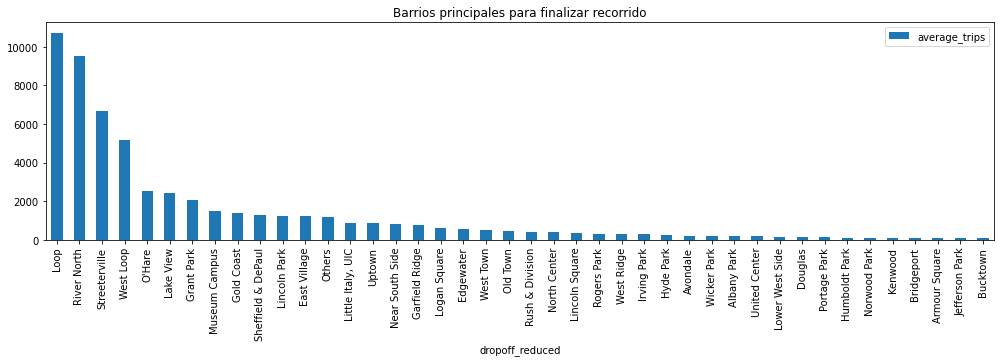

In [26]:
#gráfica de cantidades de viajes terminados por barrios 
df_trips['dropoff_reduced']= df_trips['dropoff_location_name'].where( df_trips['average_trips']>70,'Others')
df_trips.groupby('dropoff_reduced').sum().sort_values(by='average_trips',ascending=False
                                                                                     ).plot(kind='bar',figsize=(17,4))
plt.title('Barrios principales para finalizar recorrido')
plt.show()

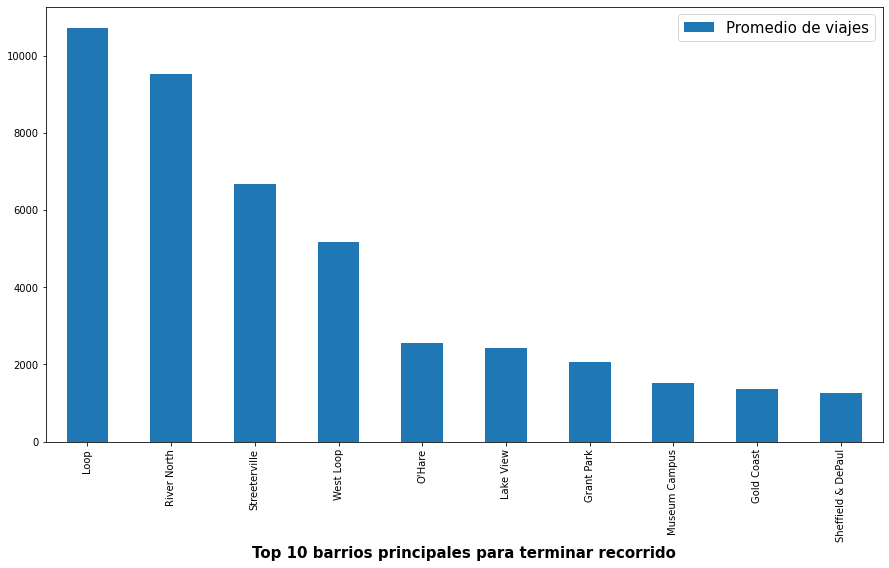

In [27]:
#Top 10 barrios principales para terminar recorrido
top10_neighborhoods.plot(x='dropoff_location_name', y='average_trips', kind='bar', figsize=(15,8))
plt.legend(['Promedio de viajes'], fontsize=15)
plt.xlabel('Top 10 barrios principales para terminar recorrido', fontsize=15, fontweight='bold')
plt.show()

In [28]:
print('Los 10 barrios principales en terminación de viajes representan el', 
      round(df_trips[df_trips['average_trips']>1259]['average_trips'].sum()/df_trips['average_trips'].sum()*100,2),
      '% de todos los viajes.')

Los 10 barrios principales en terminación de viajes representan el 76.69 % de todos los viajes.


In [29]:
print('El barrio Loop, en terminación de viajes, representan el',round(10727.466/df_trips['average_trips'].sum()*100,2
                                                                                          ),'% de todos los viajes.')

El barrio Loop, en terminación de viajes, representan el 19.02 % de todos los viajes.


###### Conclusión:

- Los 10 barrios principales en terminación de viajes representan el 76.69 % de todos los viajes.

- El barrio Loop es donde terminan la mayoría de los viajes (19.02%), seguido por los barrios River North, Streeterville y West Loop. Los siguientes vecindarios tienen la mitad o menos viajes que los barrios mencionados anteriormente.

## Empresas de taxis y viajes

Se analizará la cantidad de viajes por empresa de taxis.

In [30]:
#top 10 compañías de taxis según número de viajes
top10_taxi = df_company.sort_values(by='trips_amount', ascending=False).head(10).reset_index(drop=True)
top10_taxi

,company_name,trips_amount
0,Flash Cab,19558
1,Chicago Medallion Leasing INC,11974
2,Taxi Affiliation Services,11422
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


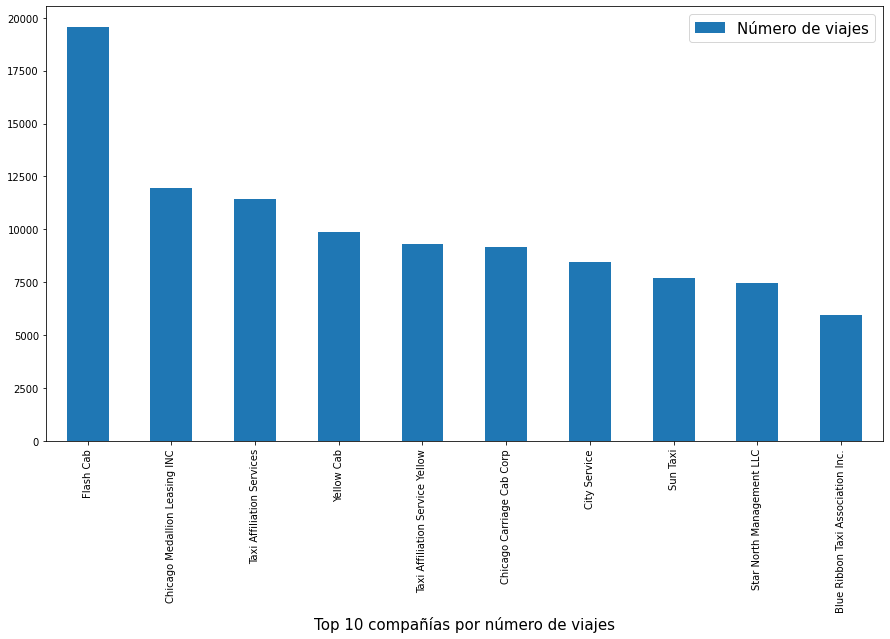

In [31]:
#Gráfico de las top 10 compañias de taxis según número de viajes
top10_taxi.plot(x='company_name', y='trips_amount', kind='bar', figsize=(15,8))
plt.legend(['Número de viajes'], fontsize=15)
plt.xlabel('Top 10 compañías por número de viajes', fontsize=15)
plt.show()

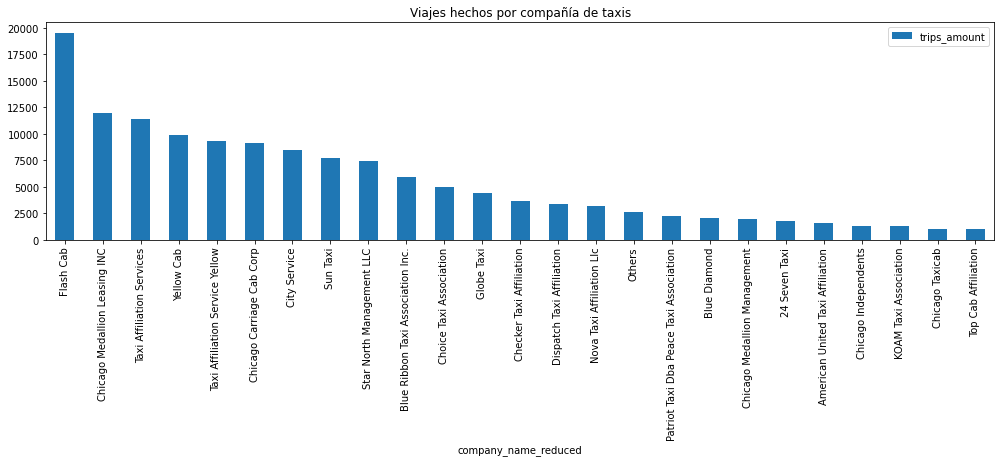

In [32]:
#gráfica de cantidades de viajes hechos por cada compañía
df_company['company_name_reduced'] = df_company['company_name'].where(df_company['trips_amount']>500,'Others')
df_company.groupby('company_name_reduced').sum().sort_values(by='trips_amount',ascending=False
                                                                                    ).plot(kind='bar',figsize=(17,4))
plt.title('Viajes hechos por compañía de taxis')
plt.show()


In [33]:
print('Las 10 compañías de taxis principales poseen el',
      round(df_company[df_company['trips_amount']>=5953]['trips_amount'].sum()/df_company['trips_amount'].sum()*100,2),
      '% de todos los viajes.')

Las 10 compañías de taxis principales poseen el 73.47 % de todos los viajes.


In [34]:
print('La empresa Flash Cab es la principal compañía de taxis, posee el',
      round(19558/df_company['trips_amount'].sum()*100,2), '% de todos los viajes.')

La empresa Flash Cab es la principal compañía de taxis, posee el 14.24 % de todos los viajes.


###### Conclusión:

- Las 10 compañías de taxis principales poseen el 73.47 % de todos los viajes.

- La empresa Flash Cab es la principal compañía de taxis, posee el 14.24 % de todos los viajes.

## Relación entre clima y duración de viajes


Se analizará la duración de viajes según el tipo de clima.

In [35]:
#Obtener la media de cada condición de clima
df_trips_la.groupby('weather_conditions').mean('duration_seconds')

,duration_seconds,weekday
weather_conditions,,
Bad,2427.205556,5
Good,1999.675676,5


In [36]:
#mediana de cada condición de clima
df_trips_la.groupby('weather_conditions').median('duration_seconds')

,duration_seconds,weekday
weather_conditions,,
Bad,2540.0,5
Good,1800.0,5


Los viajes donde el clima es malo (Bad), tienden a durar más que cuando el clima es bueno (Good).

In [37]:
print('En promedio, los viajes con clima malo duran',2540-1800, 'segundos más, o',round((2540-1800)/60,2 ),
      'minutos más, que los viajes con clima bueno.')

En promedio, los viajes con clima malo duran 740 segundos más, o 12.33 minutos más, que los viajes con clima bueno.


###### Conclusión:

- Los viajes donde el clima es malo (Bad), tienden a durar más que cuando el clima es bueno (Good).

- En promedio, los viajes con clima malo duran 740 segundos más, o 12.33 minutos más, que los viajes con clima bueno.

## Prueba de hipótesis

A continuación se prueba la siguiente hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Se establece el nivel de significación (alfa) como 5%.

In [38]:
df_trips_la_bad = df_trips_la.query('weather_conditions == "Bad"')['duration_seconds']
df_trips_la_good = df_trips_la.query('weather_conditions == "Good"')['duration_seconds']

###### Comprobación de distribución normal

Se verifica que la distribucion de ambas muestras sea normal.

- Hipótesis nula: Los datos siguen una distribución normal.

- Hipótesis alterna: Los datos no siguen una distribución normal.

In [39]:
#comprobación de distribución normal para la muestra
alpha = 0.05 #nivel de significancia alfa

# Normalidad de los residuos Shapiro-Wilk test Xone
shapiro_test = st.shapiro(df_trips_la['duration_seconds'])
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")

ShapiroResult(statistic=0.9303929209709167, pvalue=7.176113416711356e-22)
Se rechaza la hipótesis nula


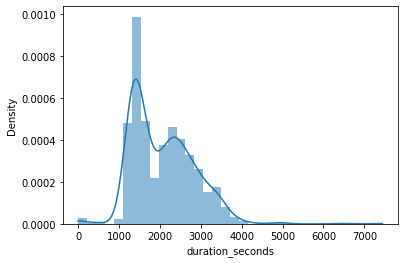

In [40]:
sn.histplot(df_trips_la['duration_seconds'], kde=True, stat="density", linewidth=0)
plt.show()

Los datos no siguen una distribución normal, a través de un gráfico, se observa una distribución bimodal que comunmente aparece al tener datos de dos sistemas o condiciones diferentes, en este caso puede inferirse por la diferencia del clima.

###### Comprobación de varianzas iguales

Se verifica que las muestras tengan varianzas iguales.

- Hipótesis nula: las muestras tienen varianzas iguales.

- Hipótesis alterna: las muestras tienen varianzas diferentes.

In [41]:
#Varianza de las muestras - prueba de levene
levene_test = st.levene (df_trips_la_bad, df_trips_la_good, center = 'median') 
print('Prueba de varianzas iguales:')
print(levene_test)

if levene_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

Prueba de varianzas iguales:
LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)
No se rechaza la hipótesis nula



Al no recharzarse la hipótesis nula, se asume que las muestras tienen varianzas iguales.

### "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

###### Aplicar prueba de hipótesis

Se tiene una distribución binomial con varianzas iguales por lo que se continua la prueba de hipótesis aplicando el test de Mann-Whitney.

- Hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, es igual los sábados lluviosos.

- Hipótesis alterna: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, cambia los sábados lluviosos.

In [42]:
ttest,pvalue = st.mannwhitneyu(df_trips_la_bad,df_trips_la_good, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <alpha:
    print("Se rechaza la hipótesis nula.")
else:
    print("No se rechaza la hipótesis nula")

p-value:0.0000
Se rechaza la hipótesis nula.


Por lo tanto se puede determinar que la duración promedio de los viajes desde el Loop ahsta el Aeropuerto Internacional O'Hare, cambia los sábados lluviosos.

## Conclusión / Resultados

Respecto a los 10 barrios principales en terminación de viajes:

- Los 10 barrios principales en terminación de viajes representan el 76.69 % de todos los viajes.

- El barrio Loop es donde terminan la mayoría de los viajes (19.02%), seguido por los barrios River North, Streeterville y West Loop. Los siguientes vecindarios tienen la mitad o menos viajes que los barrios mencionados anteriormente.

Respecto a las empresas de taxis y viajes:

- Las 10 compañías de taxis principales poseen el 73.47 % de todos los viajes.

- La empresa Flash Cab es la principal compañía de taxis, posee el 14.24 % de todos los viajes.

Respecto a la relación entre el clima y la duración de los viajes:

- Los viajes donde el clima es malo (Bad), tienden a durar más que cuando el clima es bueno (Good).

- En promedio, los viajes con clima malo duran 740 segundos más, o 12.33 minutos más, que los viajes con clima bueno.

- Existen varios motivos por los que los viajes demoran más los días que llueven, como un tráfico más lento debido a un empeoramiento de las condiciones de manejo propias de la lluvia. Esto por ejemplo hace que un viaje demore más de lo usual comparado a los días que no llueve.

Respecto a la hipótesis:

- La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, cambia los sábados lluviosos. Los sábados con mal clima hace que los viajes aumenten un promedio de 12.33 minutos comparados a los sábados con buen clima.

### Conclusión general

Anteriormente del proyecto como tal se realizó una recuperación de datos de una página web de los datos del clima de Chicago. En esto se creó un dataframe que sería usado para la prueba de la hipótesis.

#### Importar los archivos

Se importaron los 3 dataframes, los primeros dos denominados 'df_company' y 'df_trips', fueron analizados para determinar los diez barrios principales en términos de finalización y las diez principales compañías de taxis según el número de recorrido. El tercero se usó para la prueba de hipótesis.

#### Estudiar los datos que contienen y tipos de datos correctos

Antes de poder comprobarlo, se analizó la calidad de los datos que no presentaban mayor problema, el que si ameritaba mayor atención fue la columna 'start_ts' del dataframe 'df_trips_la' que presentaba un tipo de datos que no sería el más apropiado y se lo transformó a el tipo fecha. También se revisó a más a fondo a las columnas que podían presentar problemas como la columna 'company_name' que tenía duplicados por el nombre de la compañía que estaban escritos con una palabra faltante y se los unió. La columna 'dropoff_location_name' no tenía problema alguno, comprobar si la columna 'weather_conditions' mostraba 'Good' y 'Bad' y el transfromar la columna 'start_ts' a tipo fecha.

#### Identificación de los 10 principales barrios en términos de finalización

Se realizaron dos gráficos, uno en el que se puede apreciar solo los 10 principales barrios y otro en el que se pueden ver más barrios dando una visión más general de estos. 

#### Identificación de las 10 compañías principales de taxis según número de viajes

Se realizaron dos gráficos, en el que se puede visualizar las 10 compañías principales de taxis según el número de viajes y otro gráfico donde se ve de manera más general el resto de compañías para dar una mejor impresión de la diferencia de uso de ciertas compañías comparadas a las otras.

#### Prueba de hipótesis

Previo a realizar la prueba se verificó si la distribución era normal, y resultó que no, era de caracter bimodal presumible a el factor del clima de bueno y malo. Posterior verificar si la varianza era igual y usando la prueba de Levene se comprueba que si eran iguales. Ya con esto se pasó a la prueba de hipótesis en la que aplicando el test se obtiene que se rechaza la hipótesis nula de que la duración promedio no cambia según el clima y se acepta la hipósis alterna de que la duración promedio si cambia según el clima.

Finalmente todos los resultados pertinentes del trabajo se encuentran en el punto 8 de conclusión / resultados.